In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
column_names=['datetime','temp']

intermittent_data=pd.read_excel('intermittent_fault.xlsx',names=column_names,header=None)
normal_data=pd.read_excel('normal_node_temp.xlsx',names=column_names,header=None)
soft_data=pd.read_excel('soft_fault.xlsx',usecols=[0,1],names=column_names,header=None)
transient_data=pd.read_excel('transient_fault.xlsx',names=column_names,header=None)

In [4]:
intermittent_data.head()

,datetime,temp
0,2016-05-25 21:15:39,31.81
1,2016-05-25 21:15:40,31.17
2,2016-05-25 21:15:40,31.32
3,2016-05-25 21:15:41,31.66
4,2016-05-25 21:15:41,31.00


In [5]:
print(len(intermittent_data))
print(len(normal_data))
print(len(soft_data))
print(len(transient_data))

879
566
711
1709


In [6]:
## Checked all the values and there are no null values

intermittent_data.isnull().sum()
normal_data.isnull().sum()
soft_data.isnull().sum()
transient_data.isnull().sum()

datetime    0
temp        0
dtype: int64

In [7]:
# Changing the index in weach dataframe using for loop

data_frames=[normal_data,intermittent_data,soft_data,transient_data]
for df in data_frames:
    df.set_index('datetime',inplace=True)
    df.index=pd.to_datetime(df.index)

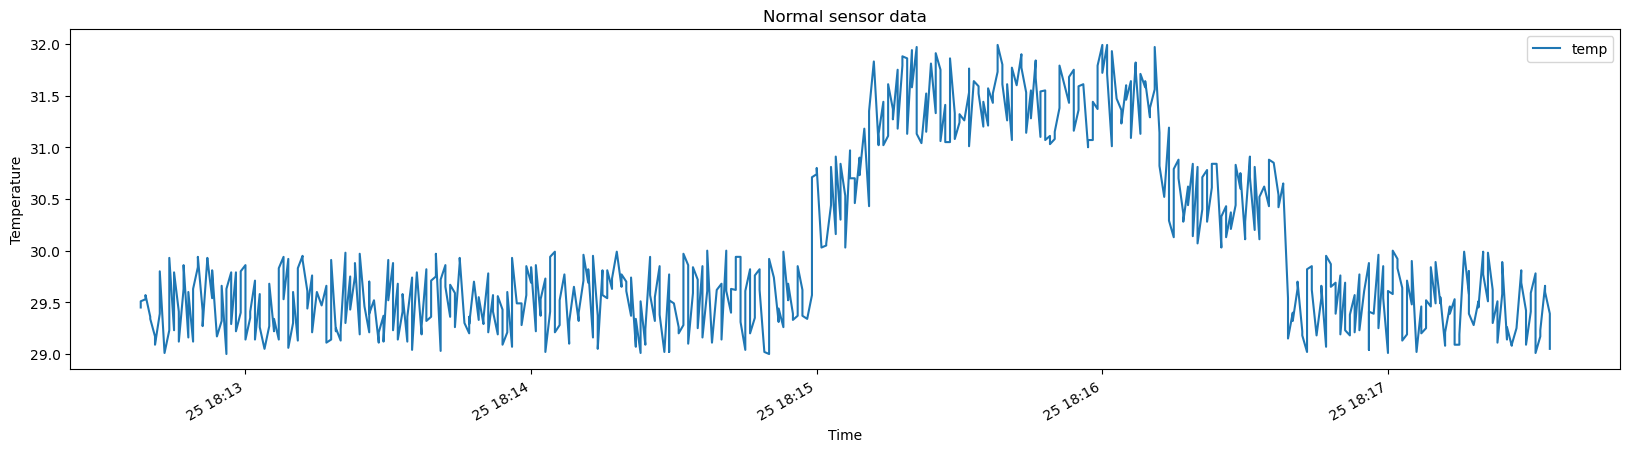

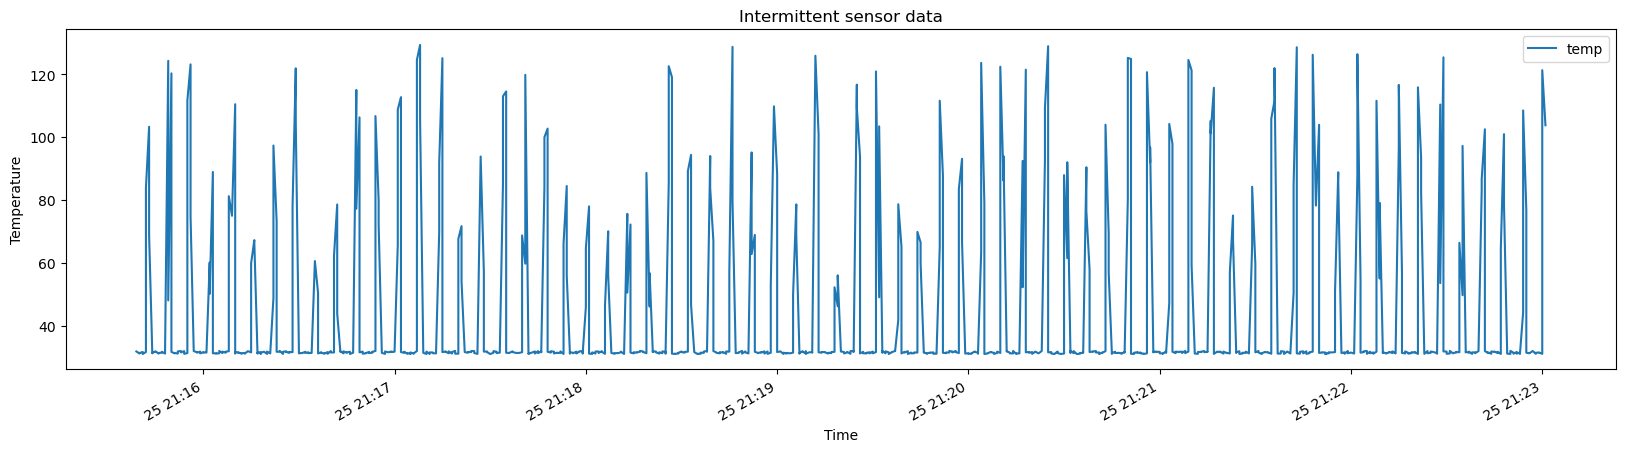

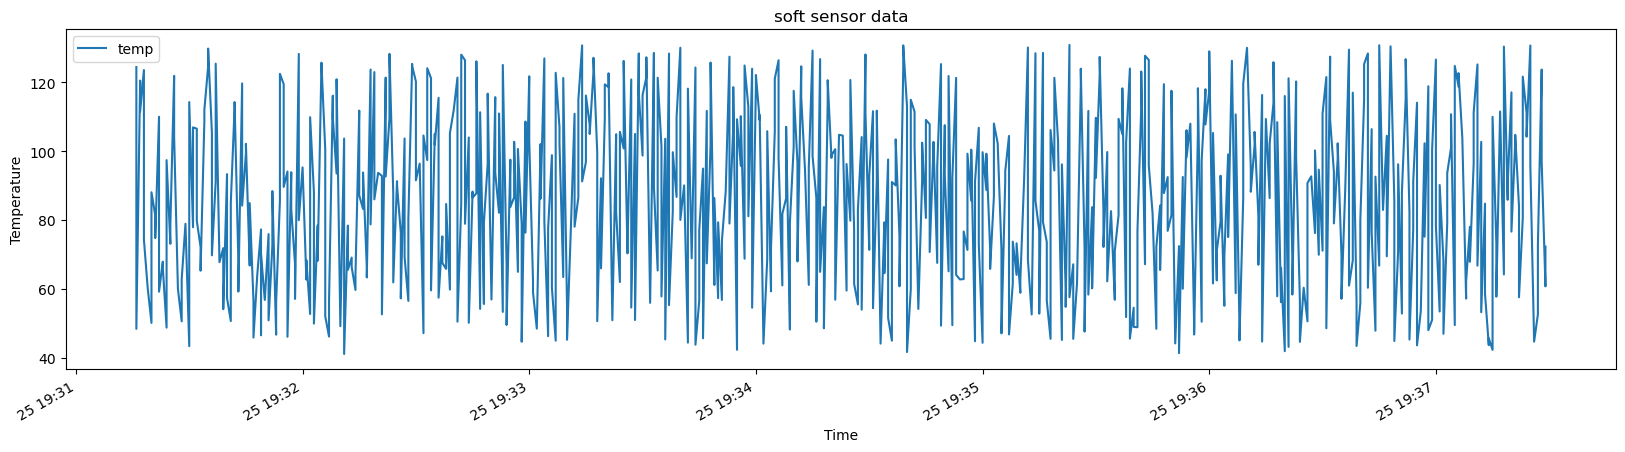

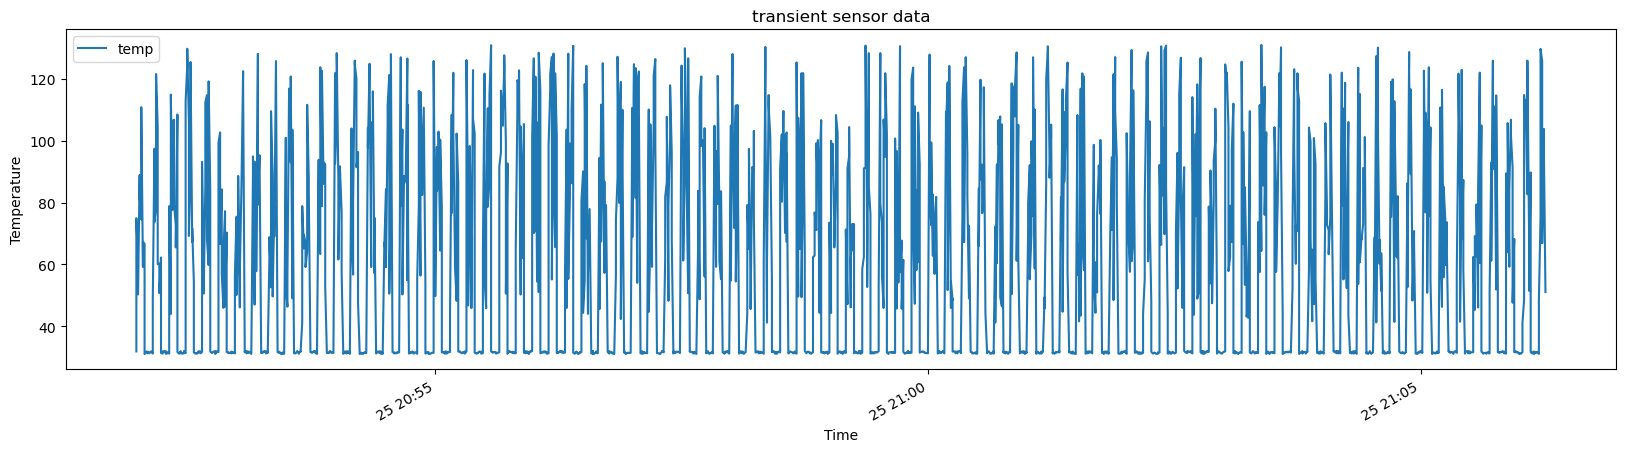

In [8]:
# Plotting the data along with the titles

titles=['Normal sensor data','Intermittent sensor data','soft sensor data','transient sensor data']

for data,title in zip(data_frames,titles):
    data.plot(style='-',figsize=(20,5),title=title)
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.show()

In [9]:
# Labelling the data to ease the solving process

normal_data['label']=0
intermittent_data['label']=1
soft_data['label']=2
transient_data['label']=3

In [10]:
# Concatinating all the dataFrames

data=pd.concat([normal_data,intermittent_data,soft_data,transient_data])
data.index=data.index.time
data.index.freq='S'
data

,temp,label
18:12:38,29.45,0
18:12:38,29.51,0
18:12:39,29.53,0
18:12:39,29.57,0
18:12:40,29.36,0
...,...,...
21:06:14,125.87,3
21:06:14,66.83,3
21:06:15,103.82,3
21:06:15,100.03,3


In [11]:
data.describe()

,temp,label
count,3865.000000,3865.000000
mean,56.221855,1.921863
std,32.458712,1.117849
min,29.000000,0.000000
25%,31.300000,1.000000
50%,31.860000,2.000000
75%,81.190000,3.000000
max,130.980000,3.000000


In [12]:
# Dividing the data into Independent and dependent features

X=data.drop(['label'],axis=1)
y=data['label']

# PURPOSE

In [13]:
## Creating Sequences and Labels for Time Series Forecasting(weather forecast, stock price prediction etc)
## which is typically used in time series analysis or sequential data processing for machine learning, especially 
## with Recurrent Neural Networks (RNNs) or Long Short-Term Memory networks (LSTMs).

sequence_length = 50
sequences = []
labels = []

for i in range(len(X) - sequence_length):
    sequences.append(X[i:i+sequence_length])
    labels.append(y[i+sequence_length])

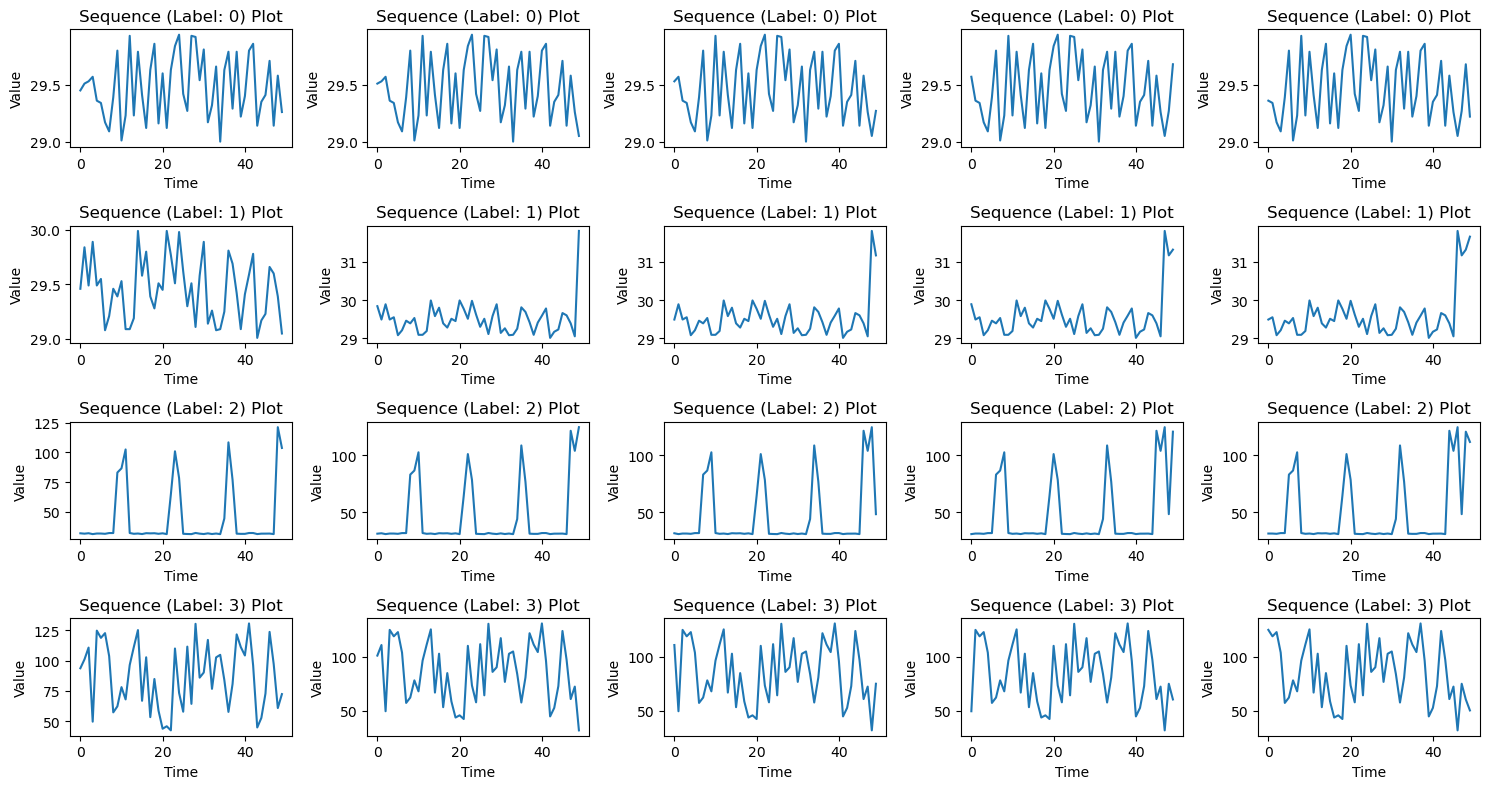

In [14]:
unique_labels = [0,1,2,3]

fig, axes = plt.subplots(4, 5, figsize=(15, 8))

for idx, label in enumerate(unique_labels):

    sequences_with_label = [seq for seq, lbl in zip(sequences, labels) if lbl == label]

    for i, sequence in enumerate(sequences_with_label[:5]):
        time_index = np.arange(len(sequence))
        ax = axes[idx, i]
        ax.plot(time_index, sequence)
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')
        ax.set_title(f'Sequence (Label: {label}) Plot')
plt.tight_layout()
plt.show()

In [15]:
sequences = np.array(sequences)
labels = np.array(labels)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(sequences,labels,test_size=0.3,random_state=42)

In [17]:
X_train[0]

array([[ 45.54],
       [ 61.66],
       [119.07],
       [123.95],
       [ 71.87],
       [ 47.65],
       [111.69],
       [ 58.39],
       [ 83.76],
       [ 60.19],
       [109.69],
       [ 92.23],
       [122.18],
       [127.38],
       [ 82.57],
       [ 72.21],
       [ 99.77],
       [ 62.23],
       [ 82.61],
       [ 56.88],
       [ 71.04],
       [ 81.41],
       [109.39],
       [104.96],
       [118.25],
       [ 51.85],
       [102.54],
       [124.01],
       [ 45.61],
       [ 54.58],
       [ 49.  ],
       [ 48.92],
       [ 76.83],
       [112.64],
       [123.13],
       [ 67.19],
       [127.71],
       [126.48],
       [ 95.9 ],
       [ 82.02],
       [ 48.46],
       [ 72.2 ],
       [ 84.25],
       [ 65.52],
       [119.46],
       [ 87.84],
       [ 92.49],
       [ 76.89],
       [ 81.49],
       [117.55]])

In [18]:
!pip install tensorflow

In [19]:
import tensorflow as tf
from tensorflow.keras import models,layers
model=models.Sequential()
model.add(layers.LSTM(64, input_shape=(sequence_length, X.shape[1]),return_sequences=False))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=15,batch_size=64,validation_split=0.2)



# model = keras.Sequential([
    # layers.LSTM(64, input_shape=(sequence_length, X.shape[1]), return_sequences=False),
    # layers.Dense(4, activation='softmax')
# ])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)
# layers.LSTM(32, return_sequences=False)

Epoch 1/15


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3523 - loss: 1.3799 - val_accuracy: 0.4682 - val_loss: 1.0867
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5027 - loss: 1.0093 - val_accuracy: 0.7528 - val_loss: 0.6371
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9013 - loss: 0.5234 - val_accuracy: 0.9888 - val_loss: 0.2882
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9715 - loss: 0.2670 - val_accuracy: 0.9906 - val_loss: 0.1343
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9833 - loss: 0.1296 - val_accuracy: 0.9925 - val_loss: 0.0670
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9832 - loss: 0.0886 - val_accuracy: 0.9551 - val_loss: 0.1374
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9628 - loss: 0.1247 - val_accuracy: 0.9925 - val_loss: 0.0509
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9881 - loss: 0.0667 - val_accuracy: 0.9944 - val_loss: 0.

Text(0.5, 1.0, 'Loss Per Epoch')

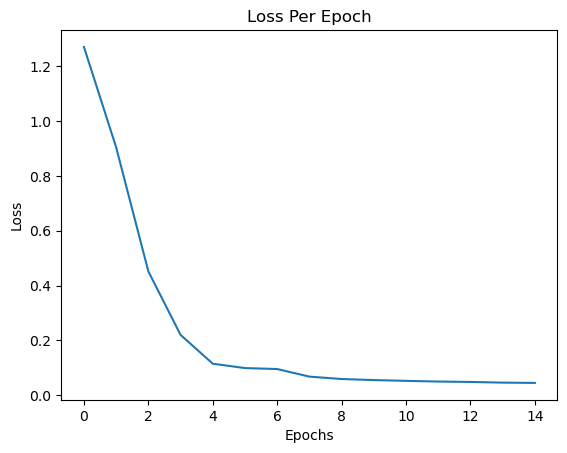

In [20]:
loss_per_epoch=history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Per Epoch')


In [21]:
test_loss, test_accuracy=model.evaluate(X_test,y_test)
print(f'test_accuracy={test_accuracy*100}')

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9938 - loss: 0.0357
test_accuracy=99.47597980499268


In [23]:
predictions=model.predict(X_test)
predictions

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[5.9402705e-04, 9.9831140e-01, 4.2363252e-05, 1.0522741e-03],
       [1.1940483e-03, 2.2817689e-03, 9.8067456e-01, 1.5849631e-02],
       [4.3048931e-04, 1.2091007e-03, 1.2086153e-02, 9.8627430e-01],
       ...,
       [2.3109523e-04, 7.5453828e-04, 7.4298767e-04, 9.9827147e-01],
       [2.0020908e-04, 7.4776047e-04, 8.4781460e-04, 9.9820423e-01],
       [2.0217414e-04, 7.4741122e-04, 6.7897019e-04, 9.9837142e-01]],
      dtype=float32)

In [24]:
from sklearn.metrics import classification_report
predicted_labels = np.argmax(predictions, axis=1)

class_report = classification_report(y_test, predicted_labels)

print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.99      1.00      1.00       262
           2       0.98      0.99      0.99       206
           3       1.00      0.99      1.00       499

    accuracy                           0.99      1145
   macro avg       0.99      1.00      0.99      1145
weighted avg       0.99      0.99      0.99      1145



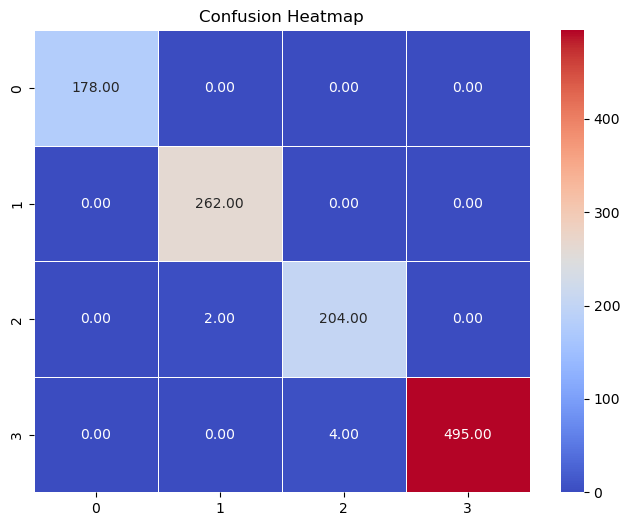

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Confusion Heatmap')
plt.show()

In [26]:
lstm_layer = model.layers[0]  
weights_and_biases = lstm_layer.get_weights()

W, U, b = weights_and_biases

In [27]:
print(W[0][0])
print(U[0][0])
print(b[0])

0.118497945
0.04760189
0.006501765


# K NEAREST NEIGHBORS

In [28]:
# Splitting the master data into training and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
# Converting 1D array to 2D array using reshape(-1,1) because we cannot transform 1D array

y=np.array(y)
y=y.reshape(-1,1)

In [30]:
# Standardizing or normalizing the data points to increase the accuracy(Here it is not necessary)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
y_scaled=sc.transform(y)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
# Using Cross Validation of K-fold validation to increase the efficiency by selecting the optimum k value

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

cv_score=[]
k_values=list(range(1,50))

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
    cv_score.append(score.mean())
    
optimum_k=k_values[np.argmax(cv_score)]
print('optimum K value',optimum_k)                   
                       

optimum K value 46


In [32]:
# Importing the algorithm and keeping k as optimum value

from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=46)

In [33]:
# Training the model

neigh=neigh.fit(X_train,y_train)

In [34]:
# Predicting the model

y_pred=neigh.predict(X_test)

In [35]:
# Check the accuracy of the model

from sklearn.metrics import accuracy_score

In [36]:
score=accuracy_score(y_test,y_pred)
print(score)

0.5304010349288486


# RANDOM FOREST CLASSIFIER

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='gini')
rf.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.5304010349288486


# NAIVE BAYES

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('Model Accuracy:',gnb.score(X_test,y_test))

Model Accuracy: 0.3577586206896552


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
